# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1870)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1870)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities and len(cities) < 666:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

666

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_data = {"City":[],"Country":[],"Latitude":[],"Longitude":[],"Max Temp(F)":[],"Humidity%":[],"Cloudiness%":[],"Windspeed(MPH)":[],"Hemisphere":[]} 
setnum = 1
recnum = 1
for city in cities:
    response = requests.get(query_url + city)
    response_json = response.json()
    if response.status_code == 200:
        if recnum < 50:
            print(f"Processing Record {recnum} of Set {setnum} | {city}")
            recnum = recnum + 1
        else:
            print(f"Processing Record {recnum} of Set {setnum} | {city}")
            recnum = 1
            setnum = setnum + 1
        weather_data["City"].append(city)
        weather_data["Country"].append(response_json["sys"]["country"])
        weather_data["Latitude"].append(response_json["coord"]["lat"])
        weather_data["Longitude"].append(response_json["coord"]["lon"])
        weather_data["Max Temp(F)"].append(response_json["main"]["temp_max"])
        weather_data["Humidity%"].append(response_json["main"]["humidity"])
        weather_data["Cloudiness%"].append(response_json["clouds"]["all"])
        weather_data["Windspeed(MPH)"].append(response_json["wind"]["speed"])
        if response_json["coord"]["lat"] > 0:
            hemisphere = "North"
        if response_json["coord"]["lat"] <=0:
            hemisphere = "South"
        weather_data["Hemisphere"].append(hemisphere)
    else:
        print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | calama
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | udachnyy
Processing Record 6 of Set 1 | ahipara
City not found. Skipping...
Processing Record 7 of Set 1 | marzuq
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | santa isabel do rio negro
Processing Record 12 of Set 1 | salalah
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | noumea
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | khatanga
City not found. Skipping...
Processing Record 23 of Set 1 | caye

Processing Record 38 of Set 4 | karasjok
Processing Record 39 of Set 4 | sangar
Processing Record 40 of Set 4 | bonnyville
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | nhulunbuy
Processing Record 43 of Set 4 | butembo
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | bilma
Processing Record 46 of Set 4 | neftcala
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | grindavik
Processing Record 1 of Set 5 | mao
Processing Record 2 of Set 5 | khonsa
Processing Record 3 of Set 5 | marrakesh
Processing Record 4 of Set 5 | cabo san lucas
Processing Record 5 of Set 5 | half moon bay
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | martapura
Processing Record 8 of Set 5 | kununurra
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | torbay
City not found. Skipping...
Processing Record 11 of 

Processing Record 28 of Set 8 | mangai
Processing Record 29 of Set 8 | huarmey
Processing Record 30 of Set 8 | fort nelson
Processing Record 31 of Set 8 | bontang
Processing Record 32 of Set 8 | trairi
Processing Record 33 of Set 8 | findlay
Processing Record 34 of Set 8 | fethiye
Processing Record 35 of Set 8 | saint-joseph
Processing Record 36 of Set 8 | sindor
Processing Record 37 of Set 8 | mackay
Processing Record 38 of Set 8 | le havre
Processing Record 39 of Set 8 | tommot
Processing Record 40 of Set 8 | balkanabat
Processing Record 41 of Set 8 | hambantota
Processing Record 42 of Set 8 | balud
Processing Record 43 of Set 8 | guararapes
Processing Record 44 of Set 8 | eyl
Processing Record 45 of Set 8 | khangah dogran
Processing Record 46 of Set 8 | broken hill
Processing Record 47 of Set 8 | kundiawa
Processing Record 48 of Set 8 | casa grande
City not found. Skipping...
Processing Record 49 of Set 8 | emerald
Processing Record 50 of Set 8 | hovd
Processing Record 1 of Set 9 | 

Processing Record 15 of Set 12 | yulara
Processing Record 16 of Set 12 | rizhao
Processing Record 17 of Set 12 | sadasivpet
Processing Record 18 of Set 12 | sarangani
Processing Record 19 of Set 12 | saint-pierre
Processing Record 20 of Set 12 | honiara
Processing Record 21 of Set 12 | ajaccio
Processing Record 22 of Set 12 | gushikawa
Processing Record 23 of Set 12 | puerto ayacucho
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | jadu
Processing Record 26 of Set 12 | movileni
Processing Record 27 of Set 12 | januaria
Processing Record 28 of Set 12 | west wendover
Processing Record 29 of Set 12 | micheweni
City not found. Skipping...
Processing Record 30 of Set 12 | benghazi
Processing Record 31 of Set 12 | gualdo tadino
City not found. Skipping...
Processing Record 32 of Set 12 | georgiyevka
Processing Record 33 of Set 12 | japura
Processing Record 34 of Set 12 | palmeira
Processing Record 35 of Set 12 | srandakan
Processing Record 36 of Set 12 | shang

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("../output_data/cities.csv",encoding="utf-8",index=False)
weather_df.head(10)

,City,Country,Latitude,Longitude,Max Temp(F),Humidity%,Cloudiness%,Windspeed(MPH),Hemisphere
0,calama,CL,-22.47,-68.93,46.40,15,0,9.17,South
1,cape town,ZA,-33.93,18.42,55.00,93,73,10.29,South
2,albany,US,42.60,-73.97,80.01,76,87,3.83,North
3,ushuaia,AR,-54.80,-68.30,33.80,96,75,13.87,South
4,udachnyy,RU,66.42,112.40,59.00,58,75,6.71,North
5,ahipara,NZ,-35.17,173.17,55.09,78,98,17.49,South
6,marzuq,YE,14.40,46.47,81.77,33,49,1.05,North
7,punta arenas,CL,-53.15,-70.92,33.80,83,31,34.45,South
8,provideniya,RU,64.38,-173.30,53.60,71,75,13.42,North
9,nikolskoye,RU,59.70,30.79,55.99,71,75,6.71,North


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()
#No cities with humidity over 100%; moving along

,Latitude,Longitude,Max Temp(F),Humidity%,Cloudiness%,Windspeed(MPH)
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,19.676095,18.250899,68.833252,69.274510,45.748366,7.472745
std,33.063496,91.166033,13.679346,19.988208,38.932466,5.215494
min,-54.800000,-175.200000,33.760000,9.000000,0.000000,0.020000
25%,-8.170000,-61.717500,59.000000,57.000000,1.000000,3.615000
50%,25.525000,24.690000,71.045000,73.000000,40.000000,6.345000
75%,46.635000,97.992500,78.800000,84.000000,84.000000,10.017500
max,78.220000,179.320000,100.000000,100.000000,100.000000,34.580000


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

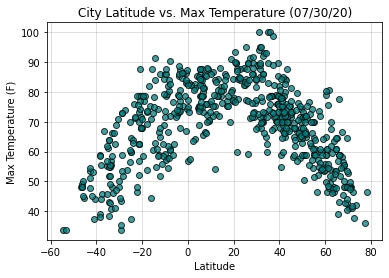

In [7]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp(F)"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Max Temperature (07/30/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.savefig('../output_data/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

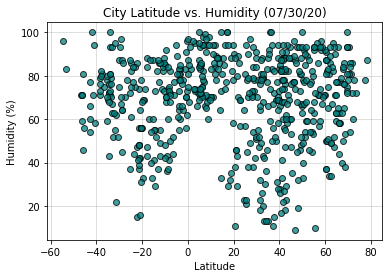

In [8]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity%"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Humidity (07/30/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.savefig('../output_data/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

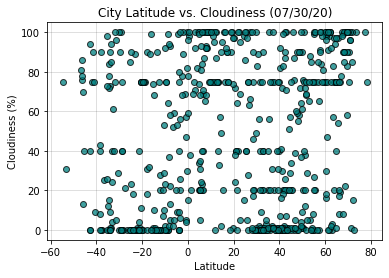

In [9]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness%"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Cloudiness (07/30/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('../output_data/Fig3.png')
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.show()

## Latitude vs. Wind Speed Plot

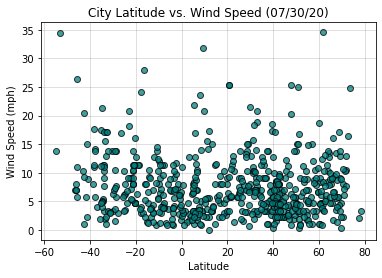

In [10]:
plt.scatter(weather_df["Latitude"],weather_df["Windspeed(MPH)"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Wind Speed (07/30/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('../output_data/Fig4.png')
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.show()

## Linear Regression

In [11]:
def regress(x,y,title,xlab,ylab):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.min()),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Hemisphere"]=="North"]
south_df = weather_df.loc[weather_df["Hemisphere"]=="South"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4622956378360416


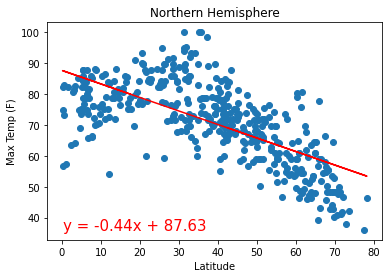

In [13]:
#def regress(x,y,title,xlab,ylab):
regress(north_df['Latitude'],north_df['Max Temp(F)'],"Northern Hemisphere","Latitude","Max Temp (F)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5144014389471779


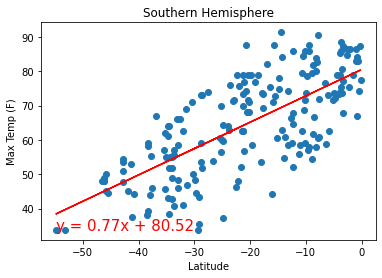

In [14]:
regress(south_df['Latitude'],south_df['Max Temp(F)'],"Southern Hemisphere","Latitude","Max Temp (F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009596777409356367


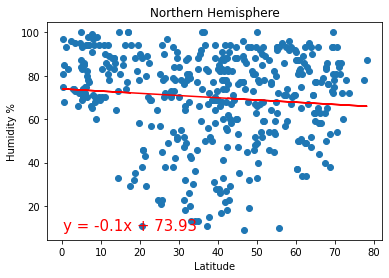

In [15]:
regress(north_df['Latitude'],north_df['Humidity%'],"Northern Hemisphere","Latitude","Humidity %")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003043273564876989


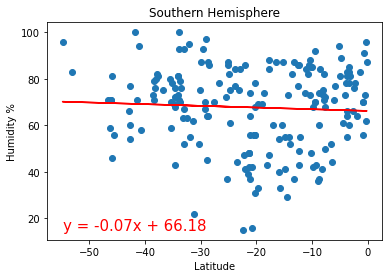

In [16]:
regress(south_df['Latitude'],south_df['Humidity%'],"Southern Hemisphere","Latitude","Humidity %")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0001635519861942571


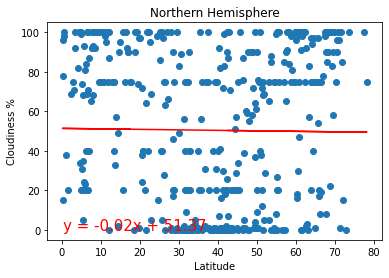

In [17]:
regress(north_df['Latitude'],north_df['Cloudiness%'],"Northern Hemisphere","Latitude","Cloudiness %")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003158978133371168


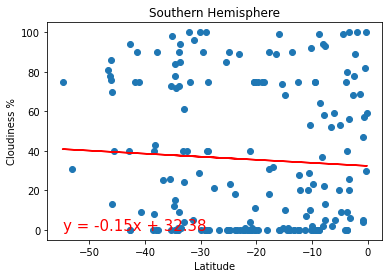

In [18]:
regress(south_df['Latitude'],south_df['Cloudiness%'],"Southern Hemisphere","Latitude","Cloudiness %")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0011398789059529181


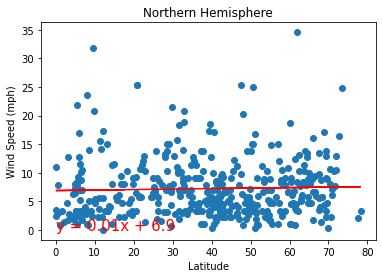

In [19]:
#
#PLUS ADD OUTPUT TO PNG FOR EACH SCATTERPLOT
#
regress(north_df['Latitude'],north_df['Windspeed(MPH)'],"Northern Hemisphere","Latitude","Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09646106487204127


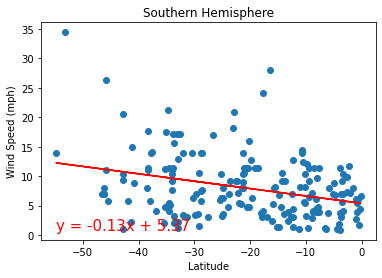

In [20]:
regress(south_df['Latitude'],south_df['Windspeed(MPH)'],"Southern Hemisphere","Latitude","Wind Speed (mph)")